In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [31]:
initial_data = pd.read_csv('initial_transactions_dataset.csv')

**EDA**

In [32]:
# Displaying the first few rows of the dataset
initial_data.head()


,Transaction_ID,Location,Payment_Method,Amount
0,1,Urban,Debit,22.59
1,2,Rural,Credit,56.48
2,3,Rural,Credit,87.93
3,4,Suburban,Digital,74.56
4,5,Urban,Debit,81.62


In [33]:
# Checking for missing values
initial_data.isnull().sum()

,0
Transaction_ID,0
Location,0
Payment_Method,0
Amount,0


In [34]:
# Summary statistics
initial_data['Amount'].describe()

,Amount
count,500.000000
mean,54.167960
std,28.233513
min,5.470000
25%,27.912500
50%,56.275000
75%,78.850000
max,99.940000


In [35]:
# Distribution of categorical variables
initial_data['Location'].value_counts()


,count
Location,
Urban,207
Rural,154
Suburban,139


In [36]:
initial_data['Payment_Method'].value_counts()

,count
Payment_Method,
Cash,165
Credit,122
Digital,112
Debit,101


In [37]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  500 non-null    int64  
 1   Location        500 non-null    object 
 2   Payment_Method  500 non-null    object 
 3   Amount          500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


<Axes: xlabel='Amount'>

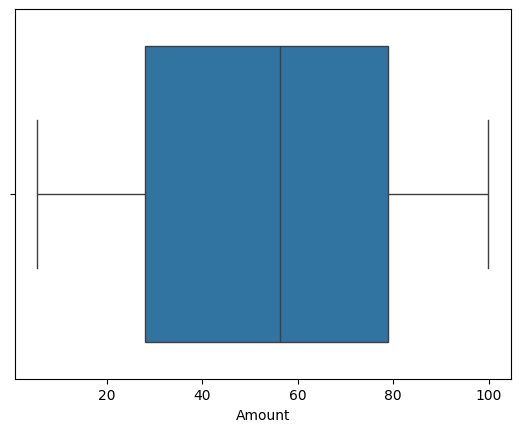

In [38]:
sns.boxplot(data=initial_data, x="Amount")

Doesnt seem like there is any outliers

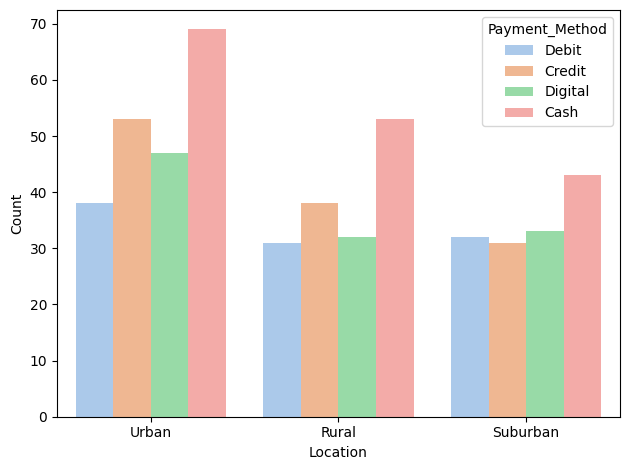

In [39]:
sns.countplot(data=initial_data, x='Location', palette='pastel',hue='Payment_Method')
plt.title('')
plt.ylabel('Count')
plt.xlabel('Location')
plt.tight_layout()
plt.show()


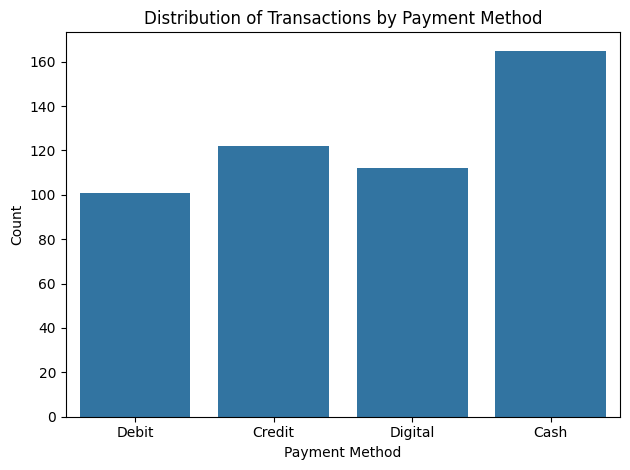

In [40]:
sns.countplot(data=initial_data, x='Payment_Method')
plt.title('Distribution of Transactions by Payment Method')
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()


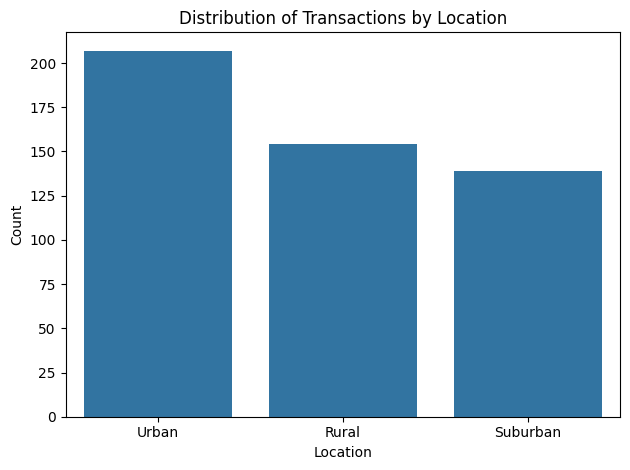

In [41]:
sns.countplot(data=initial_data, x='Location')
plt.title('Distribution of Transactions by Location')
plt.ylabel('Count')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

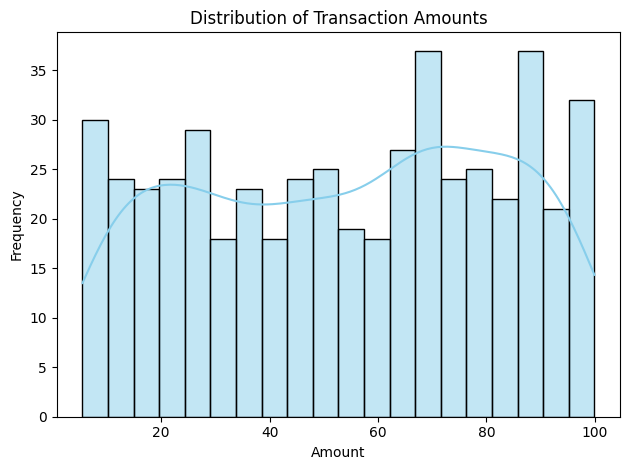

In [42]:
sns.histplot(initial_data['Amount'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Preparing Data for the Goodness-of-Fit Test :**

1. Observed Frequencies

In [43]:
payment_observed = initial_data['Payment_Method'].value_counts()


2. Expected Frequencies

In [44]:
total_transactions = payment_observed.sum()  # 500
n_methods = len(payment_observed) # 4
payment_expected = [total_transactions / n_methods] * n_methods

**Some quick explaining :**

- total_transactions / n_methods:

 This is the expected number of transactions per payment method if all methods were equally likely (under the null hypothesis).


- [total_transactions / n_methods] * n_methods:

  This repeats the expected frequency per method for all methods, creating an array that represents the expected counts for all categories.
In our case we have 4 payment methods and 500 total transactions, this formula yields [125, 125, 125, 125].


In [45]:
payment_expected

[125.0, 125.0, 125.0, 125.0]

**Preparing Data for the Independence Test :**

 - Contingency Table

In [46]:
contingency_table = pd.crosstab(initial_data['Payment_Method'], initial_data['Location'])
contingency_table

Location,Rural,Suburban,Urban
Payment_Method,,,
Cash,53,43,69
Credit,38,31,53
Debit,31,32,38
Digital,32,33,47


# **Time to perform the Tests**

**Hypotheses For Goodness of Fit**

Null Hypothesis (H₀): The payment methods are equally distributed (uniform distribution).

Alternative Hypothesis (H₁): The payment methods are not equally distributed.

In [47]:
goodness_of_fit_result = chisquare(f_obs=payment_observed, f_exp=payment_expected)
print("Goodness-of-Fit Test Result:", goodness_of_fit_result)

# For the Goodness-of-Fit Test we wanted to compare the observed counts of payment methods to a hypothesized uniform distribution hence
#the use of "chisquare"

Goodness-of-Fit Test Result: Power_divergenceResult(statistic=18.832, pvalue=0.0002961598492914237)


A very small p-value => The payment methods are not evenly distributed as hypothesized.









_______________________________________________________________________________________________________________________________________________________________________




**Hypotheses For The Independence test :**

Null Hypothesis (H₀): The choice of payment method is independent of the customer’s location.

Alternative Hypothesis (H₁): The choice of payment method is dependent on the customer’s location i.e the distribution of payment methods differs across locations.

In [48]:
chisq, pvalue, df, expected = chi2_contingency(contingency_table)
print("Chi-Square Independence Test Result:")
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

# For the Independence Test we aimed to check whether payment methods and locations were independent which required analyzing the
#contingency table hence the use of "chi2_contingency".

Chi-Square Independence Test Result:
Observed chi2: 1.8554
p-value: 0.9325


Large p-value of 0.9 => We fail to reject the null hypothesis of independence i.e there is no statistically significant association between payment methods and locations.